Importing pandas ; Importing price csv ; Importing seaborn

In [72]:
import pandas as pd
import seaborn as sns

df_price=pd.read_csv('../data/input/price.csv')
df_price['Date']=pd.to_datetime(df_price['Date'])
df_price['Year']=df_price['Date'].dt.year
df_price['Month']=df_price['Date'].dt.month
df_price['Day']=df_price['Date'].dt.day

df_price=df_price.set_index(['Year','Month','Day'])

Define remove outliers function with iqr

In [73]:
def remove_outliers(df,column,isAbsolute=False):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    outlier_mask=(df[column].abs()<(Q1-1.5*IQR)) | (df[column].abs()>(Q3+1.5*IQR)) if isAbsolute else (df[column]>(Q1-1.5*IQR)) & (df[column]<(Q3+1.5*IQR))
    df=df[(df[column]>(Q1-1.5*IQR)) & (df[column]<(Q3+1.5*IQR))]
    return df

Calculating the mean of daily difference

At normal consequences, the daily difference mean is  0.316204883321324 %


<Axes: >

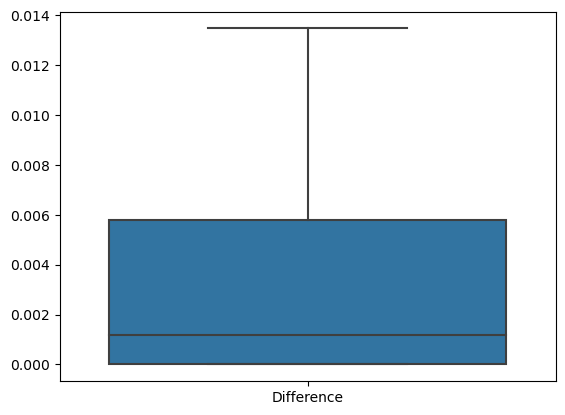

In [74]:
df_temp=df_price
df_temp['Difference']=(df_temp['Close']-df_temp['Open'])/df_temp['Open']
df_temp=remove_outliers(df_temp,'Difference',isAbsolute=True)
print("At normal consequences, the daily difference mean is ",df_temp['Difference'].abs().mean()*100,"%")
sns.boxplot(df_temp[['Difference']].abs())

Calculating monthly price standard deviation

At normal consequences, the monthly standard deviation from the mean is  2.167115070601954 %


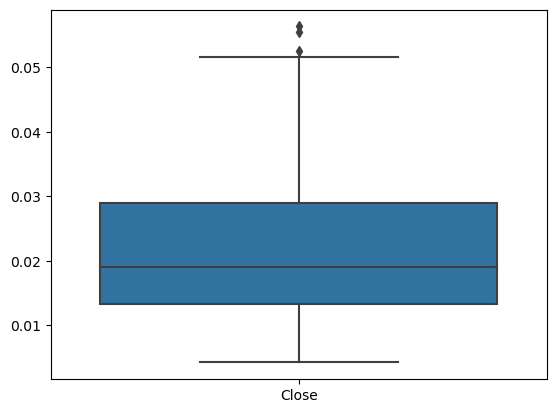

In [75]:
df_temp=df_price.drop(columns=['Date'])
df_temp=df_temp.copy().groupby(['Year','Month']).std()/df_temp.copy().groupby(['Year','Month']).mean()
df_temp=remove_outliers(df_temp,'Close',isAbsolute=True)
sns.boxplot(df_temp[['Close']].abs())
print("At normal consequences, the monthly standard deviation from the mean is ",df_temp['Close'].abs().mean()*100,"%")